In [60]:
import pandas as pd
import xgboost
import sklearn.datasets as skd
import sklearn as sks
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv('daily-minimum-temperatures-in-me.csv')

In [97]:
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        3650 non-null   object 
 1   Daily minimum temperatures  3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [99]:
df.replace('?','',inplace=True)

In [100]:
df['Date'] = pd.to_datetime(df['Date'])
df['Daily minimum temperatures'] = df['Daily minimum temperatures'].map(lambda x: float(x))

<Axes: xlabel='Date'>

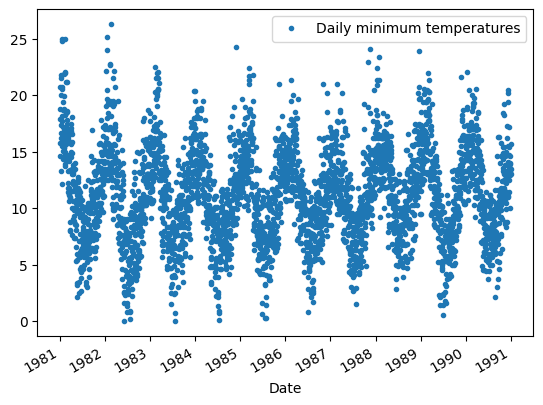

In [101]:
df.plot(x='Date',style='.')

<Axes: >

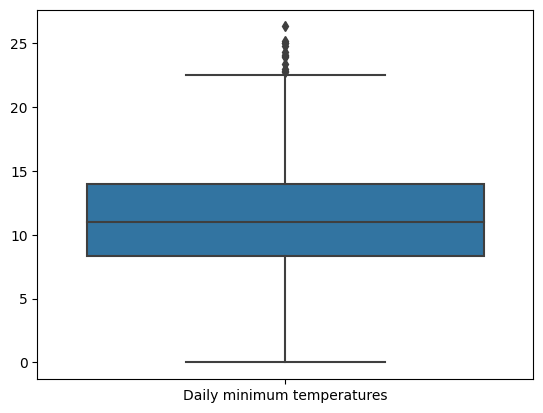

In [102]:
sns.boxplot(df)

In [103]:
df.corr()

,Date,Daily minimum temperatures
Date,1.0000,0.0122
Daily minimum temperatures,0.0122,1.0000


In [110]:
date = '10/28/1988'
train = df.loc[df['Date'] < date]
test = df.loc[df['Date'] >= date]

In [111]:
# Creating Features
train['Day'] = train['Date'].dt.day 
train['Month'] = train['Date'].dt.month 
train['Year'] = train['Date'].dt.year
train['Quarter'] = train['Date'].dt.quarter
train = train.drop('Date',axis=1)


test['Day'] = test['Date'].dt.day 
test['Month'] = test['Date'].dt.month 
test['Year'] = test['Date'].dt.year 
test['Quarter'] = test['Date'].dt.quarter
test = test.drop('Date',axis=1)

C:\Users\91978\AppData\Local\Temp\ipykernel_20856\675045949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Day'] = train['Date'].dt.day
C:\Users\91978\AppData\Local\Temp\ipykernel_20856\675045949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Month'] = train['Date'].dt.month
C:\Users\91978\AppData\Local\Temp\ipykernel_20856\675045949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [112]:
xtrain = train.drop('Daily minimum temperatures',axis=1)
xtest = test.drop('Daily minimum temperatures',axis=1)

ytrain = train['Daily minimum temperatures']
ytest = test['Daily minimum temperatures']

In [114]:
model = xgboost.XGBRegressor(
    n_estimators=1000,
    early_stopping_rounds=50
    )

In [115]:
model.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xtest, ytest)], verbose=100)

[0]	validation_0-rmse:8.16539	validation_1-rmse:8.71842


[57]	validation_0-rmse:1.78195	validation_1-rmse:3.27943


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

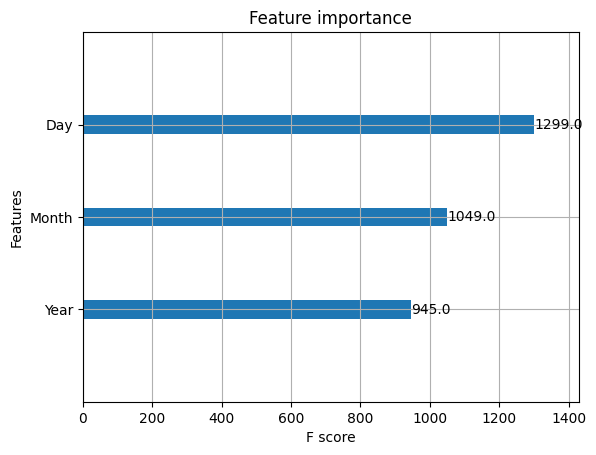

In [116]:
xgboost.plot_importance(model)

In [117]:
test['prediction'] = model.predict(xtest)

In [118]:
df_predicted = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

<Axes: >

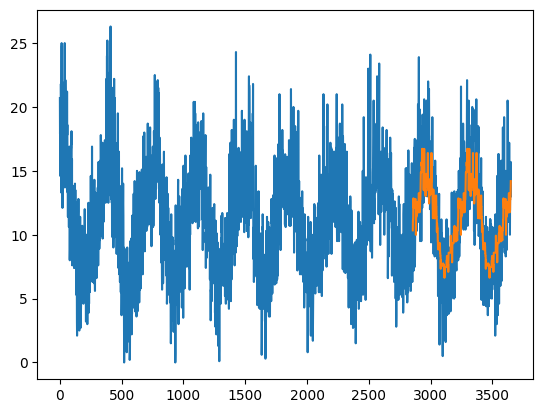

In [119]:
ax = df_predicted['Daily minimum temperatures'].plot()
df_predicted['prediction'].plot(ax=ax)